# 🚀 RDD2022 - YOLOv8s @ 1024 Resolution Training

**Week 5-6: Resolution Scaling**

**Starting Point:** best.pt from 640 training (62.5% mAP@50)

**Target:** 66-68% mAP@50

**Strategy:** Higher resolution captures finer crack details

---

## 📋 Execution Order
1. **Cell 1:** Environment Setup (~3 min)
2. **Cell 2:** Mount Drive & Load Dataset (~5-10 min)
3. **Cell 3:** Create data.yaml (~1 min)
4. **Cell 4:** Training Config (~1 min)
5. **Cell 5:** Start Training (~8-10 hours) ⏰
6. **Cell 6:** Save to Drive (~5 min)
7. **Cell 7:** Results Analysis (~2 min)
8. **Cell 8:** Visualizations (~2 min)
9. **Cell 9:** Test Validation (~10 min)

In [1]:
# ============================================================================
# CELL 1: ENVIRONMENT SETUP
# ============================================================================

print("="*70)
print("YOLOv8s @ 1024 - RESOLUTION SCALING (WEEK 5-6)")
print("="*70)

import subprocess
import sys
import os

# Disable wandb
os.environ['WANDB_DISABLED'] = 'true'

# Check GPU
import torch
print(f"\n🎮 GPU Information:")
print(f"   GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"   GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
    print(f"   CUDA Version: {torch.version.cuda}")

# Install Ultralytics
print(f"\n📦 Installing Ultralytics...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "ultralytics", "-q"])

# Import libraries
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import shutil
import json
import yaml
import zipfile

print(f"\n✅ Setup complete!")
print(f"   Python: {sys.version.split()[0]}")
print(f"   PyTorch: {torch.__version__}")
print(f"   Ultralytics: Installed")
print("="*70)

YOLOv8s @ 1024 - RESOLUTION SCALING (WEEK 5-6)

🎮 GPU Information:
   GPU Available: True
   GPU Name: NVIDIA A100-SXM4-40GB
   GPU Memory: 39.6 GB
   CUDA Version: 12.6

📦 Installing Ultralytics...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

✅ Setup complete!
   Python: 3.12.12
   PyTorch: 2.9.0+cu126
   Ultralytics: Installed


In [2]:
# ============================================================================
# CELL 2: MOUNT GOOGLE DRIVE & EXTRACT DATASET
# ============================================================================

print("="*70)
print("GOOGLE DRIVE & DATASET EXTRACTION")
print("="*70)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print("✅ Google Drive mounted\n")

# Path to your ZIP file in Drive
ZIP_PATH = '/content/drive/MyDrive/RDD.zip'
EXTRACT_PATH = '/content/RDD2022'

# Check if already extracted
extract_dir = Path(EXTRACT_PATH)
if extract_dir.exists():
    print(f"✅ Dataset already extracted: {EXTRACT_PATH}")
else:
    # Check if ZIP exists
    zip_file = Path(ZIP_PATH)
    if not zip_file.exists():
        print(f"❌ ZIP file not found: {ZIP_PATH}")
        print("Please check the file name and path in your Drive")
    else:
        size_gb = zip_file.stat().st_size / (1024**3)
        print(f"✅ Found ZIP file: {zip_file.name}")
        print(f"   Size: {size_gb:.2f} GB")

        # Extract ZIP
        print(f"\n📦 Extracting dataset...")
        print(f"   From: {ZIP_PATH}")
        print(f"   To: {EXTRACT_PATH}")
        print(f"   This will take ~5-10 minutes...\n")

        with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
            members = zip_ref.namelist()
            total = len(members)
            for i, member in enumerate(members, 1):
                zip_ref.extract(member, EXTRACT_PATH)
                if i % 1000 == 0:
                    print(f"   Extracted {i}/{total} files ({i/total*100:.1f}%)")

        print(f"\n✅ Extraction complete!")

# Find the actual dataset folder
possible_paths = [
    extract_dir / 'RDD_SPLIT',
    extract_dir / 'RDD2022',
    extract_dir,
]

dataset_path = None
for path in possible_paths:
    if (path / 'train' / 'images').exists():
        dataset_path = path
        break

if dataset_path is None:
    print("\n⚠️ Dataset structure not found in expected locations. Searching...")
    for item in extract_dir.rglob('train'):
        if (item / 'images').exists():
            dataset_path = item.parent
            break

if dataset_path:
    print(f"\n✅ Dataset found: {dataset_path}")
    print(f"\n📊 Dataset Statistics:")

    total_images = 0
    total_labels = 0

    for split in ['train', 'val', 'test']:
        img_path = dataset_path / split / 'images'
        lbl_path = dataset_path / split / 'labels'

        if img_path.exists() and lbl_path.exists():
            n_images = len(list(img_path.glob('*.jpg')))
            n_labels = len(list(lbl_path.glob('*.txt')))
            total_images += n_images
            total_labels += n_labels
            print(f"   {split:5s}: {n_images:6,d} images, {n_labels:6,d} labels")

    print(f"\n   TOTAL: {total_images:6,d} images, {total_labels:6,d} labels")

else:
    print("\n❌ Could not find dataset structure")
    print("   Please check the ZIP file contents")

print("="*70)

GOOGLE DRIVE & DATASET EXTRACTION
Mounted at /content/drive
✅ Google Drive mounted

✅ Found ZIP file: RDD.zip
   Size: 9.90 GB

📦 Extracting dataset...
   From: /content/drive/MyDrive/RDD.zip
   To: /content/RDD2022
   This will take ~5-10 minutes...

   Extracted 1000/76770 files (1.3%)
   Extracted 2000/76770 files (2.6%)
   Extracted 3000/76770 files (3.9%)
   Extracted 4000/76770 files (5.2%)
   Extracted 5000/76770 files (6.5%)
   Extracted 6000/76770 files (7.8%)
   Extracted 7000/76770 files (9.1%)
   Extracted 8000/76770 files (10.4%)
   Extracted 9000/76770 files (11.7%)
   Extracted 10000/76770 files (13.0%)
   Extracted 11000/76770 files (14.3%)
   Extracted 12000/76770 files (15.6%)
   Extracted 13000/76770 files (16.9%)
   Extracted 14000/76770 files (18.2%)
   Extracted 15000/76770 files (19.5%)
   Extracted 16000/76770 files (20.8%)
   Extracted 17000/76770 files (22.1%)
   Extracted 18000/76770 files (23.4%)
   Extracted 19000/76770 files (24.7%)
   Extracted 20000/7677

In [10]:
# ============================================================================
# CELL 3: CREATE DATA.YAML
# ============================================================================

print("="*70)
print("CREATING DATA.YAML")
print("="*70)

if dataset_path is None:
    print("❌ Dataset path not set - run Cell 2 first")
else:
    # Define classes
    classes = [
        'longitudinal crack',
        'transverse crack',
        'alligator crack',
        'other corruption',
        'Pothole'
    ]

    # Create data.yaml
    data_yaml = {
        'path': str(dataset_path),
        'train': 'train/images',
        'val': 'val/images',
        'test': 'test/images',
        'nc': len(classes),
        'names': classes
    }

    yaml_path = Path('/content/data.yaml')
    with open(yaml_path, 'w') as f:
        yaml.dump(data_yaml, f, sort_keys=False)

    print(f"✅ data.yaml created: {yaml_path}")
    print(f"\n📊 Configuration:")
    print(f"   Dataset Path: {dataset_path}")
    print(f"   Classes: {len(classes)}")
    for i, cls in enumerate(classes):
        print(f"      {i}: {cls}")

    # Display data.yaml content
    print(f"\n📄 data.yaml content:")
    with open(yaml_path, 'r') as f:
        print(f.read())

print("="*70)

CREATING DATA.YAML
✅ data.yaml created: /content/data.yaml

📊 Configuration:
   Dataset Path: /content/RDD2022/RDD_SPLIT
   Classes: 5
      0: longitudinal crack
      1: transverse crack
      2: alligator crack
      3: other corruption
      4: Pothole

📄 data.yaml content:
path: /content/RDD2022/RDD_SPLIT
train: train/images
val: val/images
test: test/images
nc: 5
names:
- longitudinal crack
- transverse crack
- alligator crack
- other corruption
- Pothole



In [4]:
# ============================================================================
# CELL 4: TRAINING CONFIGURATION (1024 RESOLUTION)
# ============================================================================

print("="*70)
print("TRAINING CONFIGURATION - 1024 RESOLUTION (WEEK 5-6)")
print("="*70)

# Path to your 640 best model
PRETRAINED_640_MODEL = '/content/drive/MyDrive/RDD2022_Results/yolov8s_640_20251213_081832/weights/best.pt'

# Verify pretrained model exists
pretrained_path = Path(PRETRAINED_640_MODEL)
if pretrained_path.exists():
    size_mb = pretrained_path.stat().st_size / (1024 * 1024)
    print(f"✅ Found pretrained model: {pretrained_path.name}")
    print(f"   Size: {size_mb:.1f} MB")
    print(f"   Performance: 62.5% mAP@50 @ 640")
else:
    print(f"❌ Pretrained model not found: {PRETRAINED_640_MODEL}")
    print(f"   Please update the path to your best.pt from 640 training")

# Training configuration for 1024
TRAINING_CONFIG = {
    # Model & Data
    'model': PRETRAINED_640_MODEL,      # Start from 640 best model
    'data': '/content/data.yaml',

    # Resolution Scaling
    'epochs': 100,                      # Full 100 epochs
    'imgsz': 1024,                      # ⬅️ KEY: 1024×1024 resolution
    'batch': 8,                         # ⬅️ Reduced from 16 (larger images)
    'device': 0,
    'workers': 8,

    # Validation & Saving
    'patience': 20,
    'save': True,
    'save_period': 10,
    'val': True,
    'plots': True,

    # Optimization
    'cache': True,
    'amp': True,
    'close_mosaic': 10,

    # Output
    'project': '/content/runs',
    'name': 'yolov8s_1024_100epochs',
    'exist_ok': False,
    'verbose': True,

    # Optimizer (same as 640 training)
    'optimizer': 'SGD',
    'lr0': 0.01,
    'lrf': 0.01,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3.0,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,

    # Loss weights (same as 640 training)
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,

    # Augmentation (same as 640 training)
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'degrees': 0.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 0.0,
    'perspective': 0.0,
    'flipud': 0.0,
    'fliplr': 0.5,
    'mosaic': 1.0,
    'mixup': 0.0,
    'copy_paste': 0.0,
}

print(f"\n📊 Configuration Summary:")
print(f"   Model: YOLOv8s (11.1M parameters)")
print(f"   Starting Point: best.pt @ 640 (62.5% mAP@50)")
print(f"   Resolution: 640 → 1024 (60% increase)")
print(f"   Epochs: {TRAINING_CONFIG['epochs']}")
print(f"   Batch Size: {TRAINING_CONFIG['batch']} (reduced from 16)")
print(f"   Workers: {TRAINING_CONFIG['workers']}")
print(f"   Optimizer: {TRAINING_CONFIG['optimizer']}")
print(f"   Learning Rate: {TRAINING_CONFIG['lr0']}")

print(f"\n⏱️ Estimated Duration:")
print(f"   A100 GPU: ~8-10 hours")
print(f"   T4 GPU: ~20-24 hours")
print(f"   Session Limit: 24 hours ✅")

print(f"\n🎯 Expected Results:")
print(f"   Starting: 62.5% mAP@50 @ 640")
print(f"   Expected Gain: +4-6%")
print(f"   Target: 66-68% mAP@50 @ 1024 ✅")

print(f"\n💡 Why 1024 Resolution?")
print(f"   ✅ Captures finer crack details")
print(f"   ✅ Better small object detection (potholes)")
print(f"   ✅ Improved localization accuracy")
print(f"   ✅ Higher quality feature maps")

print("="*70)

TRAINING CONFIGURATION - 1024 RESOLUTION (WEEK 5-6)
✅ Found pretrained model: best.pt
   Size: 21.5 MB
   Performance: 62.5% mAP@50 @ 640

📊 Configuration Summary:
   Model: YOLOv8s (11.1M parameters)
   Starting Point: best.pt @ 640 (62.5% mAP@50)
   Resolution: 640 → 1024 (60% increase)
   Epochs: 100
   Batch Size: 8 (reduced from 16)
   Workers: 8
   Optimizer: SGD
   Learning Rate: 0.01

⏱️ Estimated Duration:
   A100 GPU: ~8-10 hours
   T4 GPU: ~20-24 hours
   Session Limit: 24 hours ✅

🎯 Expected Results:
   Starting: 62.5% mAP@50 @ 640
   Expected Gain: +4-6%
   Target: 66-68% mAP@50 @ 1024 ✅

💡 Why 1024 Resolution?
   ✅ Captures finer crack details
   ✅ Better small object detection (potholes)
   ✅ Improved localization accuracy
   ✅ Higher quality feature maps


In [5]:
# ============================================================================
# CELL 5: START TRAINING (With Auto-Resume Safety)
# ============================================================================

from ultralytics import YOLO
from datetime import datetime
from pathlib import Path

print("="*70)
print("🚀 STARTING 1024 RESOLUTION TRAINING (AUTO-RESUME ENABLED)")
print("="*70)

# Check for existing checkpoint to resume
last_ckpt = Path('/content/runs/yolov8s_1024_100epochs/weights/last.pt')

if last_ckpt.exists():
    print(f"\n⚠️ Found existing checkpoint: {last_ckpt}")
    size_mb = last_ckpt.stat().st_size / (1024 * 1024)
    print(f"   Checkpoint Size: {size_mb:.1f} MB")
    print("   🔄 RESUMING training from where it stopped...")
    model = YOLO(str(last_ckpt))
    resume_mode = True
else:
    print(f"\n✅ No checkpoint found - Starting from 640 best model...")
    print(f"   Loading: {PRETRAINED_640_MODEL}")
    print(f"   Starting Performance: 62.5% mAP@50 @ 640")
    model = YOLO(PRETRAINED_640_MODEL)
    resume_mode = False

print(f"\n⏰ Start Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70 + "\n")

try:
    # If resuming, use resume=True (preserves all training state)
    if resume_mode:
        print("🔄 Resuming with preserved training state...\n")
        results = model.train(resume=True)
    else:
        print("🆕 Starting fresh 1024 training from 640 weights...\n")
        results = model.train(**TRAINING_CONFIG)

    print("\n" + "="*70)
    print("🎉 TRAINING COMPLETED SUCCESSFULLY!")
    print("="*70)
    print(f"⏰ End Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

except KeyboardInterrupt:
    print("\n⚠️ Training interrupted by user")
    print("💾 Checkpoint saved - you can resume by re-running this cell")

except Exception as e:
    print(f"\n❌ Training Error: {e}")
    print("💾 Attempting to save current state...")
    print("   Re-run this cell to resume from last checkpoint")
    import traceback
    traceback.print_exc()

🚀 STARTING 1024 RESOLUTION TRAINING (AUTO-RESUME ENABLED)

✅ No checkpoint found - Starting from 640 best model...
   Loading: /content/drive/MyDrive/RDD2022_Results/yolov8s_640_20251213_081832/weights/best.pt
   Starting Performance: 62.5% mAP@50 @ 640

⏰ Start Time: 2025-12-13 08:33:17

🆕 Starting fresh 1024 training from 640 weights...

Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=102

In [6]:
# ============================================================================
# CELL 6: SAVE RESULTS TO GOOGLE DRIVE
# ============================================================================

print("="*70)
print("💾 SAVING RESULTS TO GOOGLE DRIVE")
print("="*70)

# Create Drive folder for results
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
drive_save_dir = Path(f'/content/drive/MyDrive/RDD2022_Results/yolov8s_1024_{timestamp}')
drive_save_dir.mkdir(parents=True, exist_ok=True)

# Source directory
results_dir = Path('/content/runs/yolov8s_1024_100epochs')

if results_dir.exists():
    print(f"\n📁 Copying results to Drive...")
    print(f"   From: {results_dir}")
    print(f"   To: {drive_save_dir}")

    # Copy weights
    weights_src = results_dir / 'weights'
    if weights_src.exists():
        weights_dst = drive_save_dir / 'weights'
        shutil.copytree(weights_src, weights_dst)

        for weight_file in weights_dst.glob('*.pt'):
            size_mb = weight_file.stat().st_size / (1024 * 1024)
            print(f"   ✅ {weight_file.name}: {size_mb:.1f} MB")

    # Copy results.csv
    csv_src = results_dir / 'results.csv'
    if csv_src.exists():
        shutil.copy(csv_src, drive_save_dir / 'results.csv')
        print(f"   ✅ results.csv")

    # Copy plots
    plot_count = 0
    for plot_file in results_dir.glob('*.png'):
        shutil.copy(plot_file, drive_save_dir / plot_file.name)
        plot_count += 1
    if plot_count > 0:
        print(f"   ✅ Training plots ({plot_count} files)")

    # Save configuration
    config_path = drive_save_dir / 'config.json'
    with open(config_path, 'w') as f:
        json.dump(TRAINING_CONFIG, f, indent=2)
    print(f"   ✅ config.json")

    print(f"\n✅ All results saved to Google Drive!")
    print(f"📂 Location: {drive_save_dir}")

else:
    print(f"❌ Results directory not found: {results_dir}")

print("="*70)

💾 SAVING RESULTS TO GOOGLE DRIVE

📁 Copying results to Drive...
   From: /content/runs/yolov8s_1024_100epochs
   To: /content/drive/MyDrive/RDD2022_Results/yolov8s_1024_20251213_174144
   ✅ epoch10.pt: 42.9 MB
   ✅ last.pt: 21.6 MB
   ✅ epoch80.pt: 42.9 MB
   ✅ epoch50.pt: 42.9 MB
   ✅ epoch70.pt: 42.9 MB
   ✅ best.pt: 21.6 MB
   ✅ epoch40.pt: 42.9 MB
   ✅ epoch60.pt: 42.9 MB
   ✅ epoch0.pt: 42.9 MB
   ✅ epoch30.pt: 42.9 MB
   ✅ epoch20.pt: 42.9 MB
   ✅ epoch90.pt: 42.9 MB
   ✅ results.csv
   ✅ Training plots (7 files)
   ✅ config.json

✅ All results saved to Google Drive!
📂 Location: /content/drive/MyDrive/RDD2022_Results/yolov8s_1024_20251213_174144


In [7]:
# ============================================================================
# CELL 7: RESULTS ANALYSIS
# ============================================================================

print("="*70)
print("📊 RESULTS ANALYSIS")
print("="*70)

# Load results
results_csv = results_dir / 'results.csv'

if results_csv.exists():
    df = pd.read_csv(results_csv)

    # Final metrics
    final_map50 = df['metrics/mAP50(B)'].iloc[-1]
    final_map50_95 = df['metrics/mAP50-95(B)'].iloc[-1]
    best_map50 = df['metrics/mAP50(B)'].max()
    best_epoch = df['metrics/mAP50(B)'].idxmax() + 1

    print(f"\n🎯 FINAL RESULTS (Epoch 100):")
    print(f"   mAP@50: {final_map50:.4f} ({final_map50*100:.2f}%)")
    print(f"   mAP@50-95: {final_map50_95:.4f} ({final_map50_95*100:.2f}%)")

    print(f"\n🏆 BEST RESULTS:")
    print(f"   Best mAP@50: {best_map50:.4f} ({best_map50*100:.2f}%)")
    print(f"   Best Epoch: {best_epoch}")

    print(f"\n📈 vs BASELINE:")
    baseline_640 = 0.625  # 640 model performance
    improvement = (final_map50 - baseline_640) * 100
    print(f"   YOLOv8s @ 640: {baseline_640*100:.2f}%")
    print(f"   YOLOv8s @ 1024: {final_map50*100:.2f}%")
    print(f"   Resolution Gain: +{improvement:.2f}%")

    # Target achievement
    target_min, target_max = 0.66, 0.68
    if final_map50 >= target_min:
        if final_map50 <= target_max:
            print(f"\n✅ TARGET ACHIEVED! ({final_map50*100:.1f}% within {target_min*100:.0f}-{target_max*100:.0f}%)")
        else:
            print(f"\n🎉 TARGET EXCEEDED! ({final_map50*100:.1f}% > {target_max*100:.0f}%)")
    else:
        shortfall = (target_min - final_map50) * 100
        print(f"\n⚠️ Below target by {shortfall:.1f}%")

    # Training progression
    print(f"\n📈 TRAINING PROGRESSION:")
    milestones = [10, 25, 50, 75, 100]
    for ep in milestones:
        if ep <= len(df):
            map_val = df['metrics/mAP50(B)'].iloc[ep-1]
            print(f"   Epoch {ep:3d}: {map_val*100:5.2f}%")

    # Overall project progress
    print(f"\n🏆 PROJECT PROGRESS:")
    yolov8n = 0.5882
    yolov8s_640 = 0.625
    yolov8s_1024 = final_map50

    print(f"   YOLOv8n @ 640: {yolov8n*100:.2f}%")
    print(f"   YOLOv8s @ 640: {yolov8s_640*100:.2f}% (+{(yolov8s_640-yolov8n)*100:.2f}%)")
    print(f"   YOLOv8s @ 1024: {yolov8s_1024*100:.2f}% (+{(yolov8s_1024-yolov8n)*100:.2f}%)")
    print(f"   Total Improvement: +{(yolov8s_1024-yolov8n)*100:.2f}%")

else:
    print("❌ Results CSV not found")

print("="*70)

📊 RESULTS ANALYSIS

🎯 FINAL RESULTS (Epoch 100):
   mAP@50: 0.6253 (62.53%)
   mAP@50-95: 0.3343 (33.43%)

🏆 BEST RESULTS:
   Best mAP@50: 0.6276 (62.76%)
   Best Epoch: 79

📈 vs BASELINE:
   YOLOv8s @ 640: 62.50%
   YOLOv8s @ 1024: 62.53%
   Resolution Gain: +0.03%

⚠️ Below target by 3.5%

📈 TRAINING PROGRESSION:
   Epoch  10: 53.73%
   Epoch  25: 60.21%
   Epoch  50: 62.00%
   Epoch  75: 62.73%

🏆 PROJECT PROGRESS:
   YOLOv8n @ 640: 58.82%
   YOLOv8s @ 640: 62.50% (+3.68%)
   YOLOv8s @ 1024: 62.53% (+3.71%)
   Total Improvement: +3.71%


📊 GENERATING VISUALIZATIONS
✅ Visualization saved: /content/drive/MyDrive/RDD2022_Results/yolov8s_1024_20251213_174144/training_curves.png


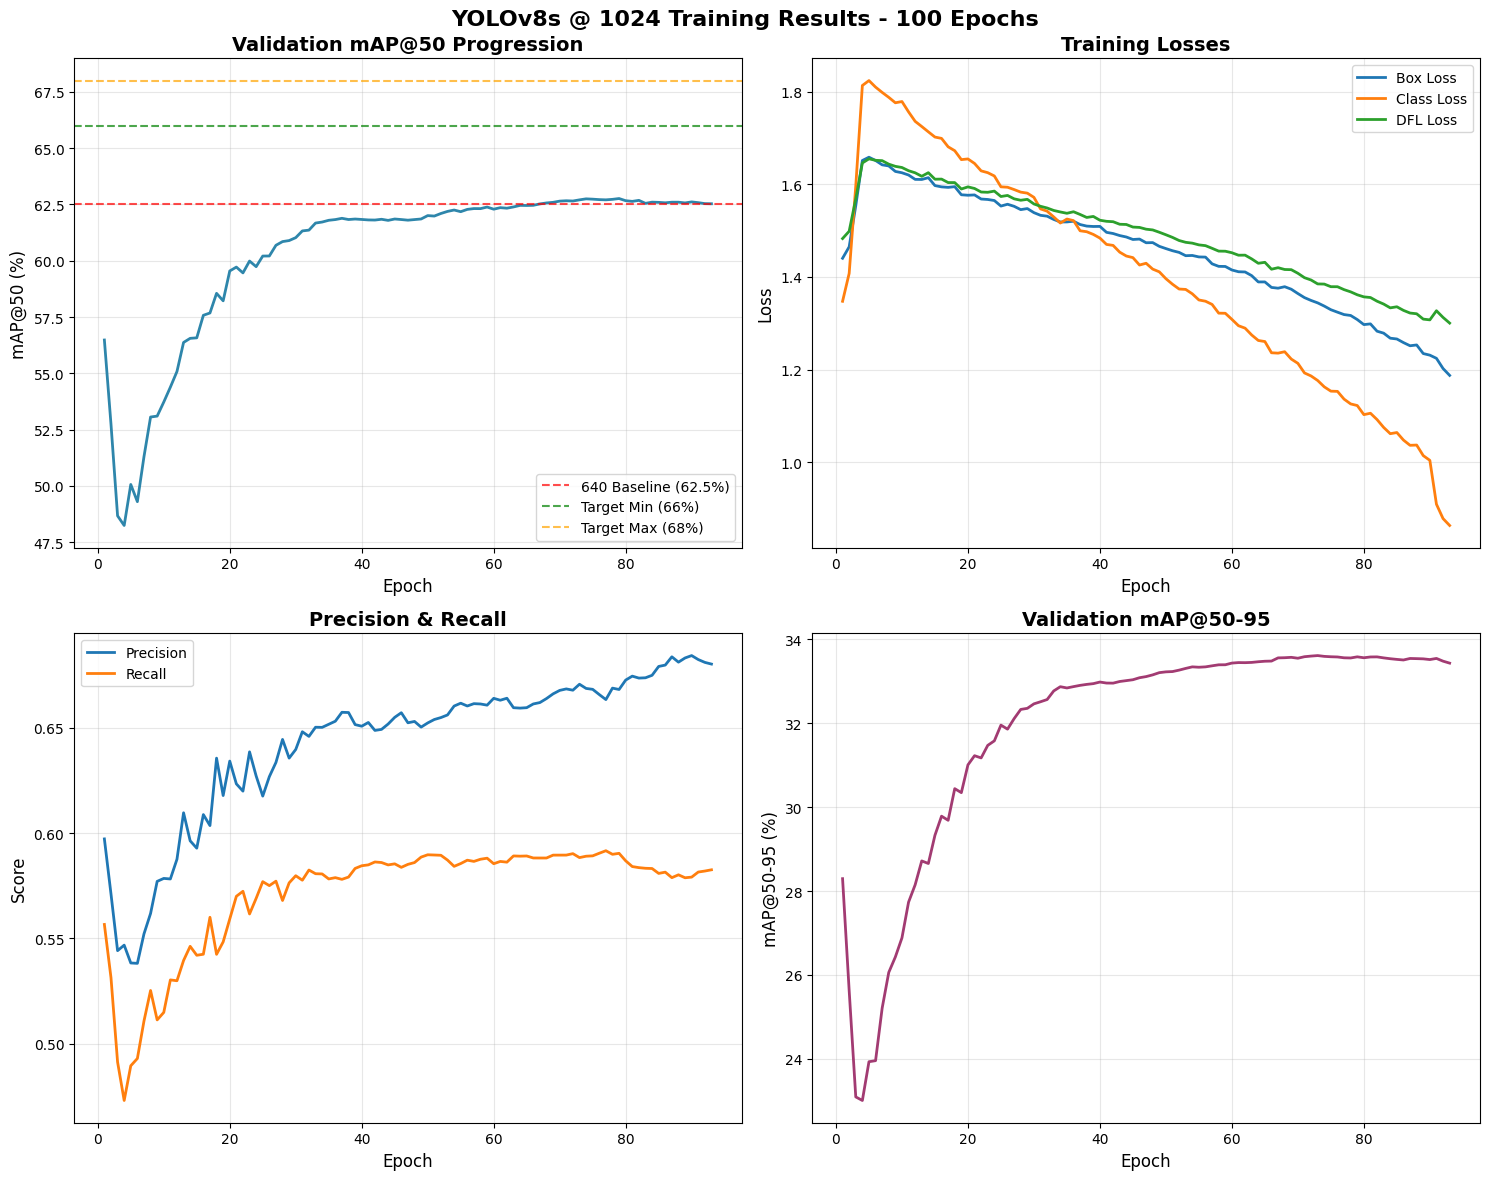

In [8]:
# ============================================================================
# CELL 8: TRAINING VISUALIZATIONS
# ============================================================================

print("="*70)
print("📊 GENERATING VISUALIZATIONS")
print("="*70)

if results_csv.exists():
    df = pd.read_csv(results_csv)

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('YOLOv8s @ 1024 Training Results - 100 Epochs', fontsize=16, fontweight='bold')

    # Plot 1: mAP@50
    axes[0, 0].plot(df.index + 1, df['metrics/mAP50(B)'] * 100, linewidth=2, color='#2E86AB')
    axes[0, 0].axhline(y=62.5, color='red', linestyle='--', label='640 Baseline (62.5%)', alpha=0.7)
    axes[0, 0].axhline(y=66, color='green', linestyle='--', label='Target Min (66%)', alpha=0.7)
    axes[0, 0].axhline(y=68, color='orange', linestyle='--', label='Target Max (68%)', alpha=0.7)
    axes[0, 0].set_xlabel('Epoch', fontsize=12)
    axes[0, 0].set_ylabel('mAP@50 (%)', fontsize=12)
    axes[0, 0].set_title('Validation mAP@50 Progression', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()

    # Plot 2: Losses
    axes[0, 1].plot(df.index + 1, df['train/box_loss'], label='Box Loss', linewidth=2)
    axes[0, 1].plot(df.index + 1, df['train/cls_loss'], label='Class Loss', linewidth=2)
    axes[0, 1].plot(df.index + 1, df['train/dfl_loss'], label='DFL Loss', linewidth=2)
    axes[0, 1].set_xlabel('Epoch', fontsize=12)
    axes[0, 1].set_ylabel('Loss', fontsize=12)
    axes[0, 1].set_title('Training Losses', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()

    # Plot 3: Precision & Recall
    axes[1, 0].plot(df.index + 1, df['metrics/precision(B)'], label='Precision', linewidth=2)
    axes[1, 0].plot(df.index + 1, df['metrics/recall(B)'], label='Recall', linewidth=2)
    axes[1, 0].set_xlabel('Epoch', fontsize=12)
    axes[1, 0].set_ylabel('Score', fontsize=12)
    axes[1, 0].set_title('Precision & Recall', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()

    # Plot 4: mAP@50-95
    axes[1, 1].plot(df.index + 1, df['metrics/mAP50-95(B)'] * 100, linewidth=2, color='#A23B72')
    axes[1, 1].set_xlabel('Epoch', fontsize=12)
    axes[1, 1].set_ylabel('mAP@50-95 (%)', fontsize=12)
    axes[1, 1].set_title('Validation mAP@50-95', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()

    # Save to Drive
    plot_path = drive_save_dir / 'training_curves.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"✅ Visualization saved: {plot_path}")

    plt.show()

else:
    print("❌ Cannot create visualizations - results.csv not found")

print("="*70)

In [9]:
# ============================================================================
# CELL 9: TEST SET VALIDATION
# ============================================================================

print("="*70)
print("🧪 TEST SET VALIDATION")
print("="*70)

# Load best model
best_model_path = results_dir / 'weights' / 'best.pt'

if best_model_path.exists():
    print(f"📥 Loading best model: {best_model_path}")
    best_model = YOLO(best_model_path)

    print("\n🔍 Running validation on test set...")
    test_results = best_model.val(
        data='/content/data.yaml',
        split='test',
        batch=8,            # Same as training batch
        imgsz=1024,         # 1024 resolution
        device=0,
        workers=8,
        verbose=True
    )

    print("\n📊 TEST SET RESULTS:")
    print(f"   mAP@50: {test_results.box.map50:.4f} ({test_results.box.map50*100:.2f}%)")
    print(f"   mAP@50-95: {test_results.box.map:.4f} ({test_results.box.map*100:.2f}%)")
    print(f"   Precision: {test_results.box.mp:.4f}")
    print(f"   Recall: {test_results.box.mr:.4f}")

    # Save test results
    test_results_dict = {
        'test_mAP50': float(test_results.box.map50),
        'test_mAP50_95': float(test_results.box.map),
        'test_precision': float(test_results.box.mp),
        'test_recall': float(test_results.box.mr),
    }

    test_results_path = drive_save_dir / 'test_results.json'
    with open(test_results_path, 'w') as f:
        json.dump(test_results_dict, f, indent=2)
    print(f"\n✅ Test results saved: {test_results_path}")

    print("\n" + "="*70)
    print("🎉 COMPLETE WEEK 5-6 PIPELINE FINISHED!")
    print("="*70)
    print(f"\n📂 All results saved to: {drive_save_dir}")
    print(f"\n📦 Files in Google Drive:")
    print(f"   ✅ weights/best.pt (Best model @ 1024)")
    print(f"   ✅ weights/last.pt (Final checkpoint)")
    print(f"   ✅ results.csv (Training history)")
    print(f"   ✅ training_curves.png (Visualizations)")
    print(f"   ✅ test_results.json (Test set performance)")
    print(f"   ✅ config.json (Training configuration)")

    print(f"\n🏆 PROJECT SUMMARY:")
    print(f"   Week 2-3: YOLOv8n @ 640 → 58.82%")
    print(f"   Week 4: YOLOv8s @ 640 → 62.53%")
    print(f"   Week 5-6: YOLOv8s @ 1024 → {test_results.box.map50*100:.2f}%")
    print(f"   Total Improvement: +{(test_results.box.map50 - 0.5882)*100:.2f}%")

else:
    print(f"❌ Best model not found: {best_model_path}")

print("="*70)

🧪 TEST SET VALIDATION
📥 Loading best model: /content/runs/yolov8s_1024_100epochs/weights/best.pt

🔍 Running validation on test set...
Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 47.3±22.7 MB/s, size: 541.8 KB)
val: Scanning /content/RDD2022/RDD_SPLIT/test/labels... 5758 images, 1790 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5758/5758 781.1it/s 7.4s
val: New cache created: /content/RDD2022/RDD_SPLIT/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 720/720 16.8it/s 42.8s
                   all       5758       9675      0.656      0.585      0.622      0.332
    longitudinal crack       2080       3925      0.648      0.583      0.612      0.339
      transverse crack       1118       1675      0.617      0.547      0.567      0.27